In [1]:
from h5py import File

raw_data = File("/ai/gno/DATA/ns/3D_CFD_Turb_M1.0_Eta1e-08_Zeta1e-08_periodic_Train.hdf5", "r")
raw_data.keys()

<KeysViewHDF5 ['Vx', 'Vy', 'Vz', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate', 'z-coordinate']>

In [2]:
raw_data['t-coordinate'].shape, raw_data['x-coordinate'].shape, raw_data['y-coordinate'].shape, raw_data['z-coordinate'].shape

((22,), (64,), (64,), (64,))

In [2]:
raw_data["Vx"].shape, raw_data["Vy"].shape, raw_data["Vz"].shape, raw_data["density"].shape, raw_data["pressure"].shape

((600, 21, 64, 64, 64),
 (600, 21, 64, 64, 64),
 (600, 21, 64, 64, 64),
 (600, 21, 64, 64, 64),
 (600, 21, 64, 64, 64))

In [6]:
grid_x = torch.tensor(np.asarray(raw_data["x-coordinate"]), dtype=torch.float32)
grid_y = torch.tensor(np.asarray(raw_data["y-coordinate"]), dtype=torch.float32)
grid_z = torch.tensor(np.asarray(raw_data["z-coordinate"]), dtype=torch.float32)
grid_t = torch.tensor(np.asarray(raw_data["t-coordinate"]), dtype=torch.float32)

x_size = grid_x.shape[0]
y_size = grid_y.shape[0]
z_size = grid_z.shape[0]
t_size = grid_t.shape[0]

grid_x = grid_x.reshape(1, -1, 1, 1, 1).repeat(1, 1, y_size, z_size, 1)
grid_y = grid_y.reshape(1, 1, -1, 1, 1).repeat(1, x_size, 1, z_size, 1)
grid_z = grid_z.reshape(1, 1, 1, -1, 1).repeat(1, x_size, y_size, 1, 1)
grid_t = grid_t.reshape(1, 1, 1, 1, -1).repeat(1, x_size, y_size, z_size, 1)

grid = torch.cat([grid_x, grid_y, grid_z], dim=-1)
grid.shape

torch.Size([1, 64, 64, 64, 3])

In [5]:
import torch
import numpy as np

v_x = torch.tensor(np.asarray(raw_data["Vx"]), dtype=torch.float32).unsqueeze(-1)
v_y = torch.tensor(np.asarray(raw_data["Vy"]), dtype=torch.float32).unsqueeze(-1)
data = torch.cat([v_x, v_y], dim=-1)
data.shape

torch.Size([600, 21, 64, 64, 64, 2])

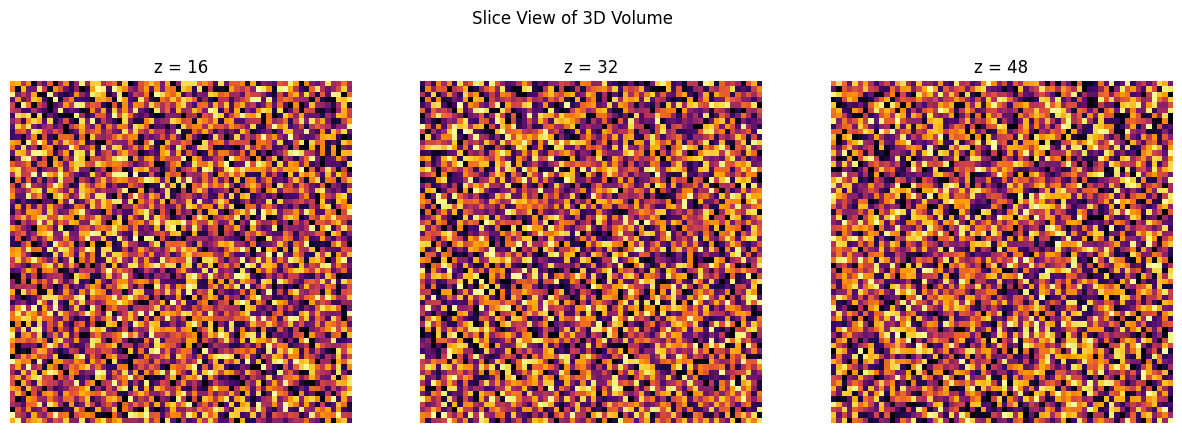

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：你可以用自己的 (64,64,64) 数据替代
data = np.random.rand(64, 64, 64)

# 选择几个切片（例如沿 z 轴）
slices = [16, 32, 48]

fig, axes = plt.subplots(1, len(slices), figsize=(15, 5))
for i, z in enumerate(slices):
    axes[i].imshow(data[:, :, z], cmap='inferno', origin='lower')
    axes[i].set_title(f'z = {z}')
    axes[i].axis('off')

plt.suptitle('Slice View of 3D Volume')
plt.show()


In [19]:
import torch


a = torch.randn(2, 6)
mean = torch.mean(a, dim=0)
a, mean

(tensor([[ 0.7750, -0.5845, -0.8858,  1.3311,  1.3707, -0.4412],
         [ 1.5822,  1.5876, -0.0499, -0.9724,  0.6183,  0.0789]]),
 tensor([ 1.1786,  0.5015, -0.4679,  0.1794,  0.9945, -0.1811]))